In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [39]:
#Loading the dataset into a dataframe
df=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Titanic/titanic_train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [40]:
df.shape

(891, 12)

In [41]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis (EDA)

In [42]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [43]:
#Checking the null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We can see that there are 177 null values in Age, 687 null values in Cabin and 2 null values in Embarked columns.

Visualize null values in the heatmap below

<Axes: >

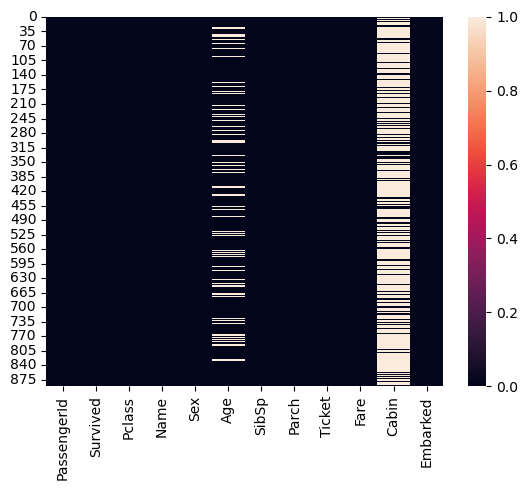

In [44]:
sns.heatmap(df.isnull())

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Handling the missing values

We can see that Cabin column has 687 null values which is more than 75% of the total number of values. There is no use of keeping the column and filling these values. So, we will drop the column.

In [46]:
df=df.drop(columns='Cabin',axis=1)

In [47]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [48]:
#Fill the null values in the Age column with its mean
df['Age']=df['Age'].fillna(df['Age'].mean())

In [49]:
#Fill the null values in the Embarked column with its mode
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [50]:
#Again checking the null values
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Again visulaizing the null values through heatmap

<Axes: >

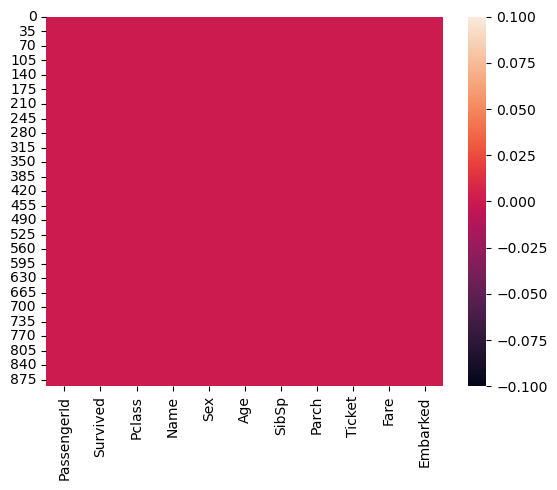

In [53]:
sns.heatmap(df.isnull())

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


Now, we can see that there are no null values in any of the columns.

In [55]:
#Checking the count of unique values in each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64


0    549
1    342
Name: Survived, dtype: int64


3    491
1    216
2    184
Name: Pclass, dtype: int64


Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64


male      577
female    314
Name: Sex, dtype: int64


29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
36.500000      1
55.500000      1
0.920000     

In [56]:
#Statistical summary of numerical columns
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


We can observe from the above data that, in the Age column, the mean and median (50%) are equal so there is no skewness but max is much bigger than 75% so there are outliers.

Also, in the Fare column, the mean is bigger than the median (50%) so there is right skewness and max is much bigger than 75% so there are outliers.

The columns PassengerId, Name and Ticket are irrelevant as there is no relationship between Survived column and these columns. So, we will remove these columns.

In [57]:
df=df.drop(columns=['PassengerId','Name','Ticket'],axis=1)

In [58]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


# Data Visualization

Univariate Analysis

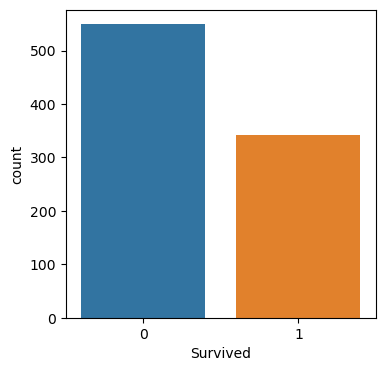

In [59]:
#Visualize the number of suvived and not survived passengers
plt.figure(figsize=(4,4))
sns.countplot(x="Survived",data=df)
plt.show()

We can see from the above graph that the number of people who did not survive which is represented by '0' is more than the number of people who survived which is represented by '1'.

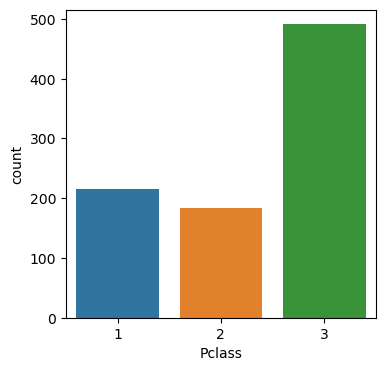

In [60]:
#Visualize the number of passengers who travelled in different passenger classes
plt.figure(figsize=(4,4))
sns.countplot(x="Pclass",data=df)
plt.show()

We can see that the number of passengers who travelled in passenger class 3 is much more than those who travelled in classes 1 and 2.

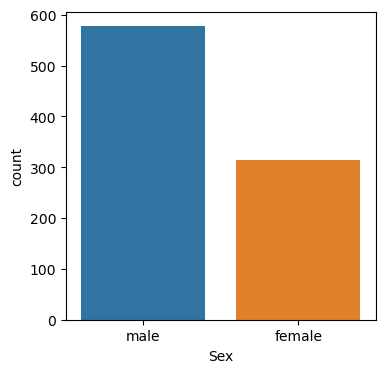

In [61]:
#Visualize the number of male and female passengers
plt.figure(figsize=(4,4))
sns.countplot(x="Sex",data=df)
plt.show()

We can see that the number of male passengers is more than the number of female passengers.

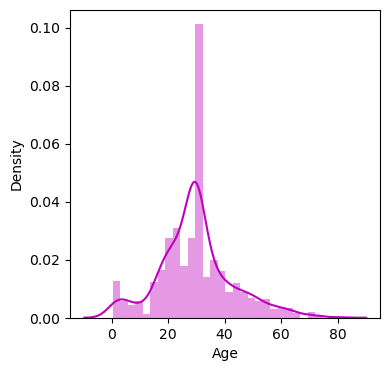

In [62]:
#Visualize the distribution of age of the passengers
plt.figure(figsize=(4,4))
sns.distplot(df['Age'],color='m')
plt.show()

We can see that Age data is normally distributed and there is no skewness.

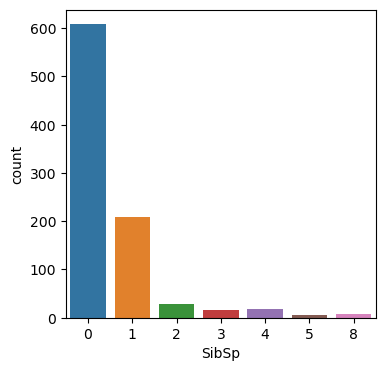

In [63]:
#Visualize the number of siblings/spouses of the passengers aboard
plt.figure(figsize=(4,4))
sns.countplot(x='SibSp',data=df)
plt.show()

We can see that the number of passengers with one sibling/spouse is much higher than the rest.

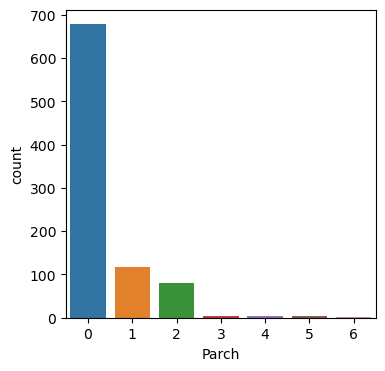

In [64]:
#Visualize the number of parents/children of the passengers aboard
plt.figure(figsize=(4,4))
sns.countplot(x='Parch',data=df)
plt.show()

We can see that the number of passengers with one parent/child is much higher than the rest.

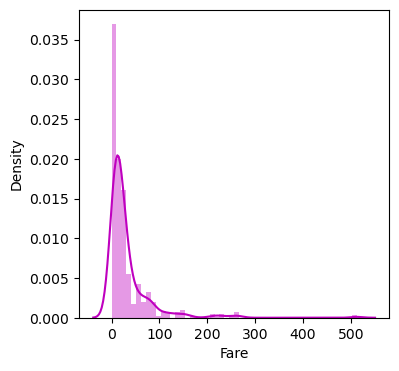

In [65]:
#Visualize the distribution of Fare of the passengers
plt.figure(figsize=(4,4))
sns.distplot(df['Fare'],color='m')
plt.show()

We can see that the distribution of Fare is skewed to the right.

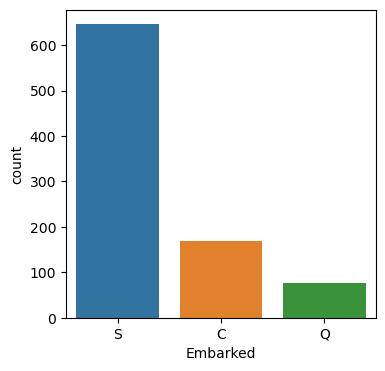

In [66]:
#Visualize the number of passengers embarked from different ports
plt.figure(figsize=(4,4))
sns.countplot(x='Embarked',data=df)
plt.show()

We can see that the number of passengers who embarked from Southampton which is represented by 'S' is more than the passengers who embarked from Cherbourg represented by 'C' and Queenstown reprensented by 'Q'.

Bivariate Analysis

Analyse the relation between features and label

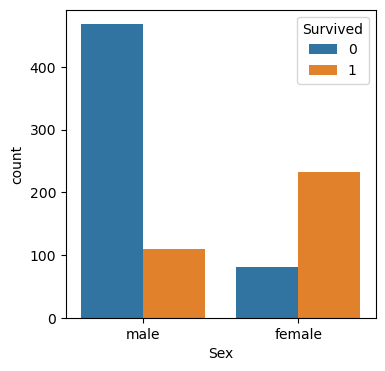

In [67]:
#Visualize the number of passengers survived based on Sex
plt.figure(figsize=(4,4))
sns.countplot(x='Sex',hue='Survived',data=df)
plt.show()

We can observe that although male passengers were more than female passengers on the ship, the number of female passengers who survived is more than the number of male passengers who survived. This gives us an important insight that during the accident female passengers were given priority over male passengers for saving.

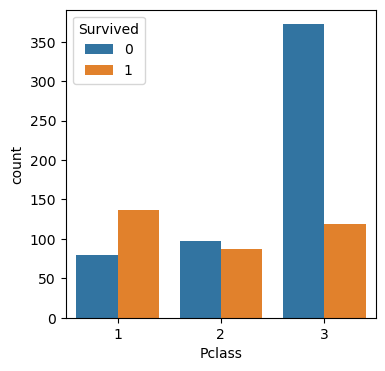

In [68]:
#Visualize the number of passengers survived based on passenger class
plt.figure(figsize=(4,4))
sns.countplot(x='Pclass',hue='Survived',data=df)
plt.show()

We can see that more number of passengers from class 1 have survived than form class 2 or 3. Also, more number of passengers from class 3 did not survive than from class 1 or 2.

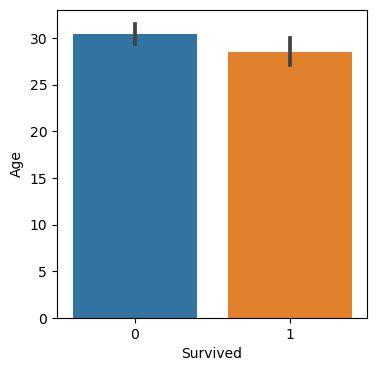

In [69]:
#Visualize the number of passengers survived based on age
plt.figure(figsize=(4,4))
sns.barplot(x='Survived',y='Age',data=df)
plt.show()

We can visualize that there is not much realtion between Survived and Age columns.

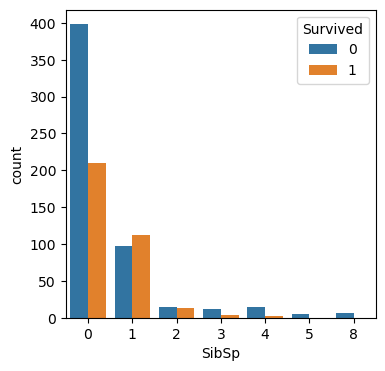

In [70]:
#Visualize the number of passengers survived based on the number of their siblings/spouses
plt.figure(figsize=(4,4))
sns.countplot(x='SibSp',hue='Survived',data=df)
plt.show()

There is not much relation between Survived an SibSp columns.

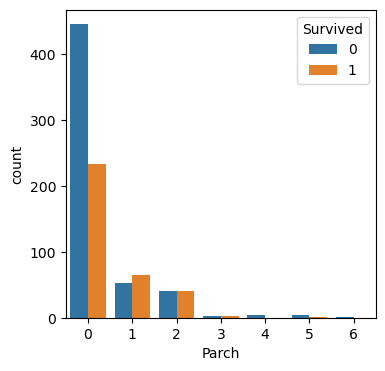

In [71]:
#Visualize the number of passengers survived based on the number of their parents/children
plt.figure(figsize=(4,4))
sns.countplot(x='Parch',hue='Survived',data=df)
plt.show()

There is not much relation between Survived an Parch columns.

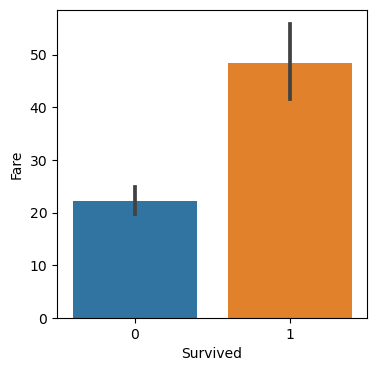

In [72]:
#Visualize the number of passengers survived based on fare
plt.figure(figsize=(4,4))
sns.barplot(x='Survived',y='Fare',data=df)
plt.show()

We can see that as the fare increases, the number of survivors also increases.

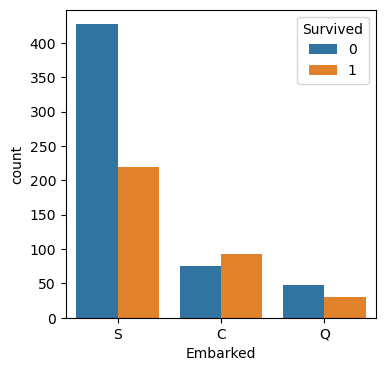

In [73]:
#Visualize the number of passengers survived based on their port of embarkation
plt.figure(figsize=(4,4))
sns.countplot(x='Embarked',hue='Survived',data=df)
plt.show()

We can see that there is not much of a relation between Embarked and Survived columns.

Analyse the correlation between features

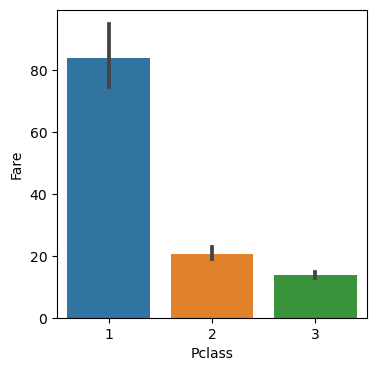

In [74]:
#Analyse the relation between Pclass and Fare
plt.figure(figsize=(4,4))
sns.barplot(x='Pclass',y='Fare',data=df)
plt.show()

We can see that the fare for class 1 is the highest. The fare for for class 2 is higher than the same for class 3.

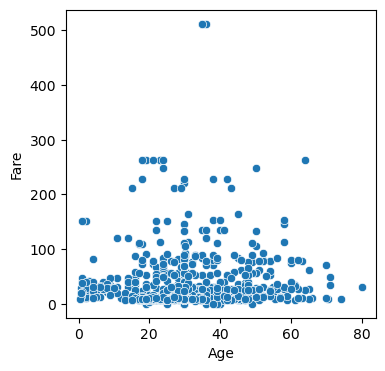

In [75]:
#Analyse the relation between Age and Fare
plt.figure(figsize=(4,4))
sns.scatterplot(x='Age',y='Fare',data=df)
plt.show()

We can observe that there is no realtion between age and fare.

Checking for Outliers

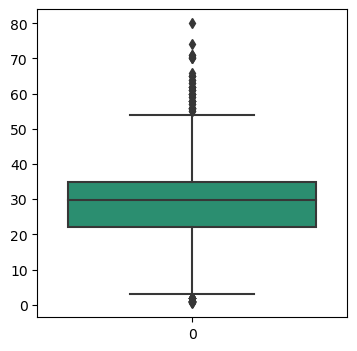

In [76]:
#Check for outliers in the Age column
plt.figure(figsize=(4,4))
sns.boxplot(df['Age'],palette="Dark2")
plt.show()

We can observe that there are outliers in the Age column.

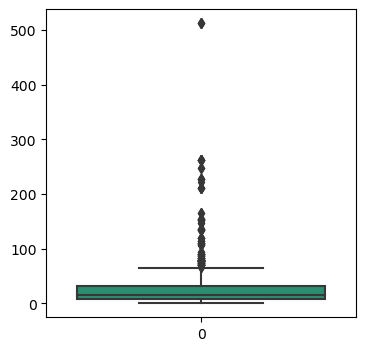

In [77]:
#Check for outliers in the Fare column
plt.figure(figsize=(4,4))
sns.boxplot(df['Fare'],palette="Dark2")
plt.show()

We can observe that there are a lot of outliers in the fare column.

As there are a lot of outliers in both the columns, if we remove them, it will result in a lot of data loss. Also, the outliers are genuine and important data. So, we decide not to remove the outliers and keep them.

Encoding Categorical Columns

In [81]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [82]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [84]:
df.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [85]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.000000,1,0,7.2500,0
1,1,1,1,38.000000,1,0,71.2833,1
2,1,3,1,26.000000,0,0,7.9250,0
3,1,1,1,35.000000,1,0,53.1000,0
4,0,3,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,0
887,1,1,1,19.000000,0,0,30.0000,0
888,0,3,1,29.699118,1,2,23.4500,0
889,1,1,0,26.000000,0,0,30.0000,1


Checking for Skewness

In [91]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Sex         0.618921
Age         0.434488
SibSp       3.695352
Parch       2.749117
Fare        4.787317
Embarked    1.543397
dtype: float64

We can see that Pclass, Sex and Embarked have skewness. But they are categorical data. So, no need to remove skewness in them. SibSp and Parch have skewness. But they are also like categorical data. So, no need to remove skewness in them. Fare has skewness and it needs to be removed. We will apply log1p transformation to the column as it contains zero values also.

In [94]:
df['Fare']=np.log1p(df['Fare'])

In [95]:
#Checking skewness again
df.skew()

Survived    0.478523
Pclass     -0.630548
Sex         0.618921
Age         0.434488
SibSp       3.695352
Parch       2.749117
Fare        0.394928
Embarked    1.543397
dtype: float64

Now, we can see that the skewness in the Fare column has been removed.

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [97]:
#Statistical summary of numerical columns
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,2.962246,0.361392
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,0.969048,0.635673
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,2.187218,0.000000
50%,0.000000,3.000000,0.000000,29.699118,0.000000,0.000000,2.737881,0.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,3.465736,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,6.240917,2.000000


We can see from the above data that in the Fare column, the mean and median are almost equal. So there is no skewness in this column.

In [98]:
#Check the correlation between features and label
cor=df.corr()
cor

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,0.543351,-0.069809,-0.035322,0.081629,0.329862,0.106811
Pclass,-0.338481,1.000000,-0.131900,-0.331339,0.083081,0.018443,-0.661022,0.045702
Sex,0.543351,-0.131900,1.000000,-0.084153,0.114631,0.245489,0.263276,0.116569
Age,-0.069809,-0.331339,-0.084153,1.000000,-0.232625,-0.179191,0.102485,0.007461
SibSp,-0.035322,0.083081,0.114631,-0.232625,1.000000,0.414838,0.318528,-0.059961
Parch,0.081629,0.018443,0.245489,-0.179191,0.414838,1.000000,0.332186,-0.078665
Fare,0.329862,-0.661022,0.263276,0.102485,0.318528,0.332186,1.000000,0.019588
Embarked,0.106811,0.045702,0.116569,0.007461,-0.059961,-0.078665,0.019588,1.000000


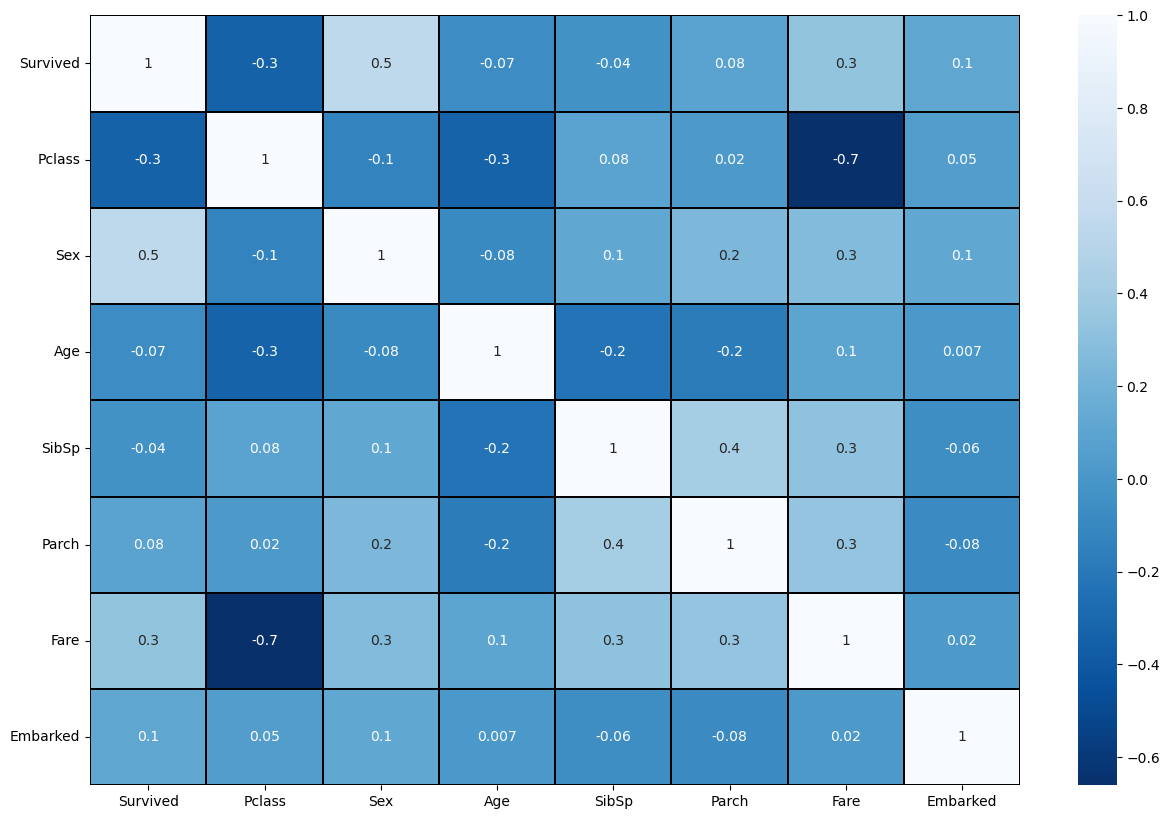

In [99]:
#Visualize the correlation between features and label
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),linewidths=0.1,fmt='.1g',linecolor='black',annot=True,cmap='Blues_r')
plt.yticks(rotation=0)
plt.show()

We can observe the following from the heatmap:

There is positive correlation between the features Embarked, Fare, Parch, Sex and the label

There is negative correlation between the features SibSp, Age, Pclass and the label.

There is high positive correlation between Sex and Survived.

There is high negative correlation between Fare and Pclass.

Separating features and label

In [102]:
x=df.drop('Survived',axis=1)
y=df['Survived']

Feature Scaling

In [103]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.827377,-0.737695,-0.592481,0.432793,-0.473674,-0.879741,-0.568837
1,-1.566107,1.355574,0.638789,0.432793,-0.473674,1.361220,1.005181
2,0.827377,1.355574,-0.284663,-0.474545,-0.473674,-0.798540,-0.568837
3,-1.566107,1.355574,0.407926,0.432793,-0.473674,1.062038,-0.568837
4,0.827377,-0.737695,0.407926,-0.474545,-0.473674,-0.784179,-0.568837
...,...,...,...,...,...,...,...
886,-0.369365,-0.737695,-0.207709,-0.474545,-0.473674,-0.333698,-0.568837
887,-1.566107,1.355574,-0.823344,-0.474545,-0.473674,0.487082,-0.568837
888,0.827377,1.355574,0.000000,0.432793,2.008933,0.242007,-0.568837
889,-1.566107,-0.737695,-0.284663,-0.474545,-0.473674,0.487082,1.005181


Now, we have done feature scaling to overcome the issue of biasness in the model.

Checking Variance Inflation Factor (VIF)

In [104]:
#Find Variance Inflation Factor of each feature
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF Values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF Values,Features
0,2.451272,Pclass
1,1.138086,Sex
2,1.203884,Age
3,1.462148,SibSp
4,1.411662,Parch
5,2.731506,Fare
6,1.048783,Embarked


We check VIF values to find out if there is any multicollinearity problem with the features which we need to solve. From the above table, we can see that none of the features have VIF value greater than 10. So, we can conclude that there is no multicollinearity problem in the features and we can proceed to the next steps.

In [105]:
y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

We can see from the above that the data in the label is not balanced. As this is a classification problem, we need to balance the data.

Balancing the Label

In [106]:
#Oversampling the data using SMOTE
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x1,y1=SM.fit_resample(x,y)

In [107]:
y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [108]:
y1.value_counts()

0    549
1    549
Name: Survived, dtype: int64

In [109]:
x.shape

(891, 7)

In [110]:
x1.shape

(1098, 7)

# Model Building

Finding the best random state

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu,"at random state",maxRS)

Best accuracy is  0.8454545454545455 at random state 150


Creating train test split

In [112]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=maxRS)

Importing the necessary modules

In [113]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [114]:
#Logistic Regression
LR=LogisticRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.8454545454545455
[[137  27]
 [ 24 142]]
              precision    recall  f1-score   support

           0       0.85      0.84      0.84       164
           1       0.84      0.86      0.85       166

    accuracy                           0.85       330
   macro avg       0.85      0.85      0.85       330
weighted avg       0.85      0.85      0.85       330



In [115]:
#Random Forest Classfier
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.8454545454545455
[[141  23]
 [ 28 138]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       164
           1       0.86      0.83      0.84       166

    accuracy                           0.85       330
   macro avg       0.85      0.85      0.85       330
weighted avg       0.85      0.85      0.85       330



In [116]:
#Extra Trees Classifier
ET=ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET=ET.predict(x_test)
print(accuracy_score(y_test,predET))
print(confusion_matrix(y_test,predET))
print(classification_report(y_test,predET))

0.8393939393939394
[[138  26]
 [ 27 139]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       164
           1       0.84      0.84      0.84       166

    accuracy                           0.84       330
   macro avg       0.84      0.84      0.84       330
weighted avg       0.84      0.84      0.84       330



In [117]:
#Decision Tree Classifier
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)
predDTC=DTC.predict(x_test)
print(accuracy_score(y_test,predDTC))
print(confusion_matrix(y_test,predDTC))
print(classification_report(y_test,predDTC))

0.8303030303030303
[[134  30]
 [ 26 140]]
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       164
           1       0.82      0.84      0.83       166

    accuracy                           0.83       330
   macro avg       0.83      0.83      0.83       330
weighted avg       0.83      0.83      0.83       330



In [118]:
#KNeighbors Classifier
KNN=KNeighborsClassifier()
KNN.fit(x_train,y_train)
predKNN=KNN.predict(x_test)
print(accuracy_score(y_test,predKNN))
print(confusion_matrix(y_test,predKNN))
print(classification_report(y_test,predKNN))

0.8424242424242424
[[134  30]
 [ 22 144]]
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       164
           1       0.83      0.87      0.85       166

    accuracy                           0.84       330
   macro avg       0.84      0.84      0.84       330
weighted avg       0.84      0.84      0.84       330



In [119]:
#Gradient Boosting Classifier
GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB=GB.predict(x_test)
print(accuracy_score(y_test,predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

0.8333333333333334
[[144  20]
 [ 35 131]]
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       164
           1       0.87      0.79      0.83       166

    accuracy                           0.83       330
   macro avg       0.84      0.83      0.83       330
weighted avg       0.84      0.83      0.83       330



In [120]:
#AdaBoost Classifier
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
predABC=ABC.predict(x_test)
print(accuracy_score(y_test,predABC))
print(confusion_matrix(y_test,predABC))
print(classification_report(y_test,predABC))

0.8303030303030303
[[137  27]
 [ 29 137]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       164
           1       0.84      0.83      0.83       166

    accuracy                           0.83       330
   macro avg       0.83      0.83      0.83       330
weighted avg       0.83      0.83      0.83       330



In [121]:
#Bagging Classifier
BC=BaggingClassifier()
BC.fit(x_train,y_train)
predBC=BC.predict(x_test)
print(accuracy_score(y_test,predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

0.8272727272727273
[[139  25]
 [ 32 134]]
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       164
           1       0.84      0.81      0.82       166

    accuracy                           0.83       330
   macro avg       0.83      0.83      0.83       330
weighted avg       0.83      0.83      0.83       330



# Cross Validation

In [123]:
from sklearn.model_selection import cross_val_score

In [124]:
#Cross Validation of Logistic Regression model
score=cross_val_score(LR,x1,y1)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is - ",accuracy_score(y_test,predLR)-score.mean())

[0.75909091 0.80909091 0.75454545 0.79452055 0.79452055]
0.7823536737235368
Difference between accuracy score and cross validation score is -  0.06310087173100865


In [125]:
#Cross Validation of Random Forest Classifier model
score=cross_val_score(RFC,x1,y1)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is - ",accuracy_score(y_test,predRFC)-score.mean())

[0.76818182 0.84090909 0.80454545 0.87671233 0.84018265]
0.8261062681610627
Difference between accuracy score and cross validation score is -  0.019348277293482763


In [126]:
#Cross Validation of Extra Trees Classifier model
score=cross_val_score(ET,x1,y1)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is - ",accuracy_score(y_test,predET)-score.mean())

[0.76818182 0.82727273 0.79545455 0.85844749 0.85388128]
0.8206475716064757
Difference between accuracy score and cross validation score is -  0.018746367787463636


In [127]:
#Cross Validation of Decision Tree Classifier model
score=cross_val_score(DTC,x1,y1)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is - ",accuracy_score(y_test,predDTC)-score.mean())

[0.74090909 0.78636364 0.77727273 0.82191781 0.84931507]
0.7951556662515566
Difference between accuracy score and cross validation score is -  0.03514736405147367


In [130]:
#Cross Validation of KNeighbors Classifier model
score=cross_val_score(KNN,x1,y1)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is - ",accuracy_score(y_test,predKNN)-score.mean())

[0.75       0.80454545 0.81363636 0.84474886 0.82191781]
0.806969696969697
Difference between accuracy score and cross validation score is -  0.035454545454545405


In [131]:
#Cross Validation of Gradient Boosting Classifier model
score=cross_val_score(GB,x1,y1)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is - ",accuracy_score(y_test,predGB)-score.mean())

[0.77727273 0.82272727 0.81818182 0.85388128 0.82191781]
0.8187961809879619
Difference between accuracy score and cross validation score is -  0.014537152345371451


In [132]:
#Cross Validation of AdaBoost Classifier model
score=cross_val_score(ABC,x1,y1)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is - ",accuracy_score(y_test,predABC)-score.mean())

[0.74545455 0.80909091 0.79090909 0.85388128 0.80365297]
0.8005977584059776
Difference between accuracy score and cross validation score is -  0.029705271897052743


In [133]:
#Cross Validation of Bagging Classifier model
score=cross_val_score(BC,x1,y1)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is - ",accuracy_score(y_test,predBC)-score.mean())

[0.78181818 0.84090909 0.80909091 0.84018265 0.84474886]
0.8233499377334994
Difference between accuracy score and cross validation score is -  0.003922789539227867


Bagging Classifier is the best model because the difference between accuracy score and cross validation score for this model is the least among all the models.

# Hyper Parameter Tuning

In [134]:
from sklearn.model_selection import RandomizedSearchCV

In [138]:
param={'n_estimators': np.arange(10, 200, 10),
       'max_samples': np.linspace(0.1, 1.0, 10),
       'max_features': np.linspace(0.1, 1.0, 10),
       'bootstrap': [True, False],
       'bootstrap_features': [True, False],
      }
RCV=RandomizedSearchCV(BaggingClassifier(),param,cv=5)
RCV.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=BaggingClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'bootstrap_features': [True, False],
                                        'max_features': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                                        'max_samples': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190])})

In [139]:
#Best parameters for the final model
RCV.best_params_

{'n_estimators': 120,
 'max_samples': 0.4,
 'max_features': 1.0,
 'bootstrap_features': False,
 'bootstrap': False}

# Building the Final Model

In [140]:
final_model=BaggingClassifier(n_estimators=120,max_samples=0.4,max_features=1.0,bootstrap_features=False,bootstrap=False)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

85.75757575757575


Therefore, the accuracy acheived by the final model is 85.75%

Plotting ROC and comparing AUC for the final model

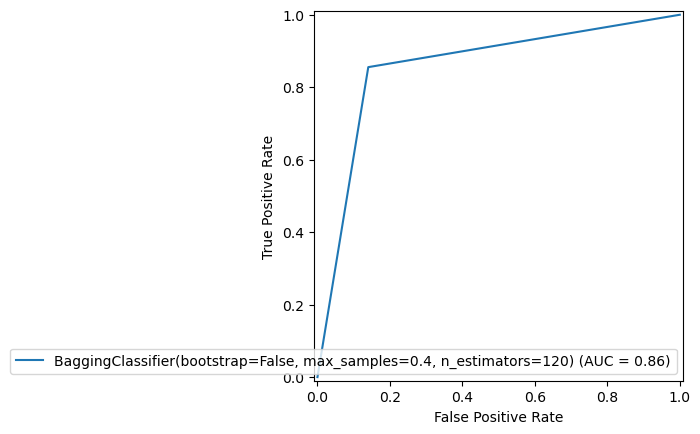

In [143]:
from sklearn import metrics
fpr,tpr,thresholds=metrics.roc_curve(y_test,pred)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=final_model)
display.plot()
plt.show()

Above is the ROC curve for the final model and AUC value for the final model is 86%.

In [144]:
#Save the model
import pickle
filename='Titanic_Survived.pkl'
pickle.dump(final_model,open(filename,'wb'))

In [145]:
#Load the saved model and compute the score
loaded_model=pickle.load(open('Titanic_Survived.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

85.75757575757575


In [151]:
#Prediction using the loaded model
df1=pd.DataFrame()
df1['Original']=y_test
df1['Predicted']=loaded_model.predict(x_test)
df1.reset_index(drop=True,inplace=True)
df1

,Original,Predicted
0,1,0
1,1,1
2,0,0
3,0,0
4,0,1
...,...,...
325,1,1
326,1,0
327,0,0
328,1,1
